In [1]:
import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio


/opt/anaconda3/envs/udemy_llm/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
classifier = pipeline("sentiment-analysis")
result = classifier("I'm never super excited to be on the way to LLM mastery")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


[{'label': 'NEGATIVE', 'score': 0.9992002844810486}]


In [3]:
ner = pipeline('ner', grouped_entities=True)
result = ner("Barack Obama was the 44 th president of the United States.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
/opt/ana

[{'entity_group': 'PER', 'score': np.float32(0.9993059), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9990847), 'word': 'United States', 'start': 44, 'end': 57}]


In [4]:
question_answerer = pipeline("question-answering")
result = question_answerer(question = "Who was the 44th president of the United States?",
                           context = "Barack Obama wast the 44th president of the United States.")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [11]:
print(result)

{'score': 0.9906411170959473, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


In [13]:
# Text Summarization

summarizer = pipeline("summarization",
                      device = 'mps')
text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""
summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use mps


 The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing . It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .


In [14]:
transrator = pipeline('translation_en_to_fr'
                      , device = 'mps')
result = transrator('Hugging Face is creating a tool that democratizes AI.')
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps


Hugging Face crée un outil qui démocratise l'AI.


In [15]:
generator = pipeline('text-generation',
                     device = 'mps')
result = generator("If there's one thing I want you to remember about using HuggingFace Pipelines, it's that")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [16]:
print(result[0]['generated_text'])

If there's one thing I want you to remember about using HuggingFace Pipelines, it's that you need to be able to do it at least once a day.

The problem is, that's not all there is to it. There are tons!

There's a lot we can do with this one.

We can implement it on a regular basis, with a few different methods.

We can do a lot more, but we'll have to say nothing about the future of this feature.

We can start by going into the code.

I'll show you what it does.

Let's start with a description of the key concept.

You know, it's not just about how the code interacts with the Pipelines. It's also about how we know what we're doing and how it works.

So, let's define what we're doing.

We use a few key concepts in this example.

We can define a Pipeline.

We add a "Send" method to the Pipelines.

We add a "Subscribe" method to the Pipelines.

We add a "Unsubscribe" method to the Pipelines.

We add a "Keep" method to the Pipelines.

We add a "Delete" method to


In [17]:
image_gen = DiffusionPipeline.from_pretrained(
    'stabilityai/stable-diffusion-2-1-base',
    torch_dtype = torch.float16,
    use_safetensors=True,
    varialt = 'fp16'
).to('mps')

text = 'A class of Data Scientists learning about AI, in the surreal style of Picasso'

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Fetching 13 files: 100%|██████████| 13/13 [01:55<00:00,  8.88s/it]
Keyword arguments {'varialt': 'fp16'} are not expected by StableDiffusionPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 6/6 [00:12<00:00,  2.04s/it]


100%|██████████| 50/50 [44:35<00:00, 53.51s/it]  


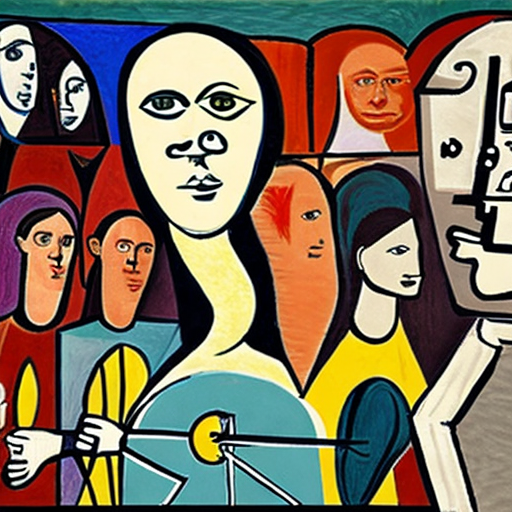

In [18]:
image = image_gen(prompt = text).images[0]
image

In [ ]:
synthesizer = pipeline("text-to-speech",
                       model = 'microsoft/speech5_tts',
                       device = 'mps'
                       )
embeddings_dataset = load_dataset('Matthijs/cmu-arctic-xvectors',
                                  split = 'validation',)
speaker_embedding = torch.tensor(embeddings_dataset[7306]['xvector']).unsqueeze(0)

speech = synthesizer('Hi to an artifical intelligence engineer, on the way to mastery!',
                    forward_params = {'speaker_embeddings': speaker_embedding})

sf.write('speech.wav', speech['audio'].numpy(), speech['sampling_rate'])
Audio("speech.wav")